In [108]:
import pandas as pd
import numpy as np
import os
'''
import plotly.plotly as py
import plotly.graph_objs as go
'''
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True)

In [109]:
# Make directory to store images
if not os.path.exists('images'):
    os.mkdir('images')

In [68]:
# Create a noisey time series sampled from a normal distribution of mean = 0 and standard deviation = 3
num_points = 100
x_np_array = np.arange(num_points)
y_np_array = np.random.normal(size = num_points)#, scale = 3)

raw_data_df = pd.DataFrame({'y':y_np_array, 'x':x_np_array})
data = [go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y']
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

iplot({'data':data,'layout':layout2})# = layout2)


In [16]:
# Create the FWHM (Full Width Half Maximum) transforms. Note: these two functions are derived from the relation between 
# the amount of variation (distance between the two points on distribution where density is equal to half of the 
# density at the mode.

def sd_fwhm(sd):
    return sd*np.sqrt(8*np.log(2))

def fwhm_sd(fwhm):
    return fwhm/np.sqrt(8*np.log(2))

In [104]:
# Set the bandwidth of the kernel smoother. Note: decreasing this value will reduce the amount of smoothing
FWHM = 4


# Create function to calculate different values for various bandwiths
def calc_smoothed_values(FWHM):
    sd = fwhm_sd(FWHM)

    stored_smooth_values_FWHM = np.zeros(num_points)
    for x_val in x_np_array: 
        #print(x_val)
        kernel_weights = np.exp(-(x_np_array-x_val)**2/(2*sd**2))
        # Normalise the kernel weights
        kernel_weights = kernel_weights/sum(kernel_weights)
        # Multiply the kernel weights by actaul values i.e. taking a weighted average of the data points
        stored_smooth_values_FWHM[x_val] = sum(y_np_array*kernel_weights)
    return pd.DataFrame({'y':stored_smooth_values_FWHM, 'x':x_np_array})

In [105]:
# Use functions to calculate the smoothed data values
smoothed_data_FHWM_4_df = calc_smoothed_values(4)
smoothed_data_FHWM_2_df = calc_smoothed_values(2)


In [106]:
# Plot the raw and smoothed values from the kernel
data = [
    # Raw data
    go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y'], 
    name = 'Raw simulated data'
    ), 
    go.Scatter(
    x = smoothed_data_FHWM_2_df['x'],
    y = smoothed_data_FHWM_2_df['y'],
    name = 'Smoothed data (FHWM = 2)'
    ), 
    # Smoothed data with FHWM = 4
    go.Scatter(
    x = smoothed_data_FHWM_4_df['x'],
    y = smoothed_data_FHWM_4_df['y'],
    name = 'Smoothed data (FHWM = 4)'
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

iplot({'data':data,'layout':layout2})# = layout2)

In [ ]:
# Write figure to the 'images' file

data = [
    # Raw data
    go.Scatter(
    x = raw_data_df['x'],
    y = raw_data_df['y'], 
    name = 'Raw simulated data'
    ), 
    go.Scatter(
    x = smoothed_data_FHWM_2_df['x'],
    y = smoothed_data_FHWM_2_df['y'],
    name = 'Smoothed data (FHWM = 2)'
    ), 
    # Smoothed data with FHWM = 4
    go.Scatter(
    x = smoothed_data_FHWM_4_df['x'],
    y = smoothed_data_FHWM_4_df['y'],
    name = 'Smoothed data (FHWM = 4)'
    )]

layout2 = go.Layout(
    title = 'Plot of random simulated time series',
    xaxis = dict(
        title='Data index'),
    yaxis = dict(
        title='Data output')
    )

pio.write_image(fig, 'images/fig1.png')

## Gaussian Smoothing for image processing
-Notes: 

    1. Gaussian smoothing is also called Gaussian blur(ring).
    2. A result of Gaussian smoothing is a low pass filter i.e. high frequency noise is removed.
    
    WHY: edge detection can be more accurate with denoised images (lower variation amongst pixels.
    
    In image processing a 2D convolution is also referred to as a kernel where the weights sum to unity. 
 
     Must ensure kernel sums to 1 else we risk adding energy to the image

In [196]:
# Load dependencies and set appropriate parameters
import scipy.misc
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from numpy import linalg as LA

# Set matplotlib to be inline
%matplotlib inline

SIGMA_2D = 1
Gaussian_kernel_dim = 5
Gaussian_kernel_dim_mid = (Gaussian_kernel_dim/2) + (1/2)

IMAGE_NAME = "images/Feynman_noisey_2"

In [194]:
def convert_image_to_greyscale(image_name):
    '''
    Takes a string as a reference to a colour image and converts to greyscale saving with the suffix
    '_greyscale.png'.
    :param image_name: a string which is the name of the image which is to be converted to grey scale.
    '''
    img = Image.open(image_name + '.jpg').convert('LA')
    img.save(image_name + '_greyscale.png')
    
    
def reduce_dimensions_rgb_to_grayscale(image): 
    '''
    Takes an image with RGB codes as input (#pixel_width, #pixel_height, RGB_list), averages the RGB_list and returns 
    an image of shape (#pixel_width, #pixel_height) where the value is the RGB_list average. 
    '''
    

[   0.    0.   61.   73.   95.   99.   85.   66.   52.   55.   59.   65.
   66.   66.   69.   68.   64.   63.   67.   64.   58.   66.   72.   65.
   61.   64.   59.   56.   58.   79.  107.  136.  157.  176.  182.  190.
  192.  180.  156.  137.  118.  110.  126.  145.  131.  110.  103.   95.
   80.   88.   98.   95.   85.   84.   84.   88.   76.   64.   78.  109.
  145.  156.  142.  109.   72.   51.   54.   64.   87.  107.  125.  136.
  117.   88.   73.   68.   58.   57.   58.   70.   82.   92.   98.   96.
   84.   71.   66.   72.   63.   57.   62.   63.   56.   53.   58.   54.
   53.   64.   72.   64.   57.   58.   56.   53.   57.   60.   61.   60.
   59.   53.   49.   61.   72.   71.   68.   63.   58.   56.   58.   63.
   66.   64.   61.   58.   60.   65.   67.   63.   60.   67.   69.   64.
   60.   60.   63.   64.   65.   66.   62.   61.   62.   68.   72.   70.
   65.   63.   62.   62.   60.   55.   50.   51.   57.   64.   65.   54.
   46.   51.   60.   63.   60.   59.   55.   54.   

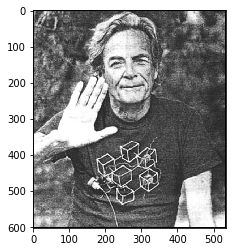

In [229]:
# Read in image and pad image with needed zeros
# NOTE: using scipy.mics.imread with parameter flatten = True reads in the grey scale image
image_num1 = scipy.misc.imread("images/Feynman_noisey_2.jpg", flatten = True)


convert_image_to_greyscale("images/Feynman_noisey_2")
image_matrix = plt.imread(IMAGE_NAME + '_greyscale.png')

'''
# Use the mean of RGB values to convert to greyscale
image_num1[0][0] = image_num1[0][0].mean(axis=-1,keepdims=1) 
print(image_num1[0])

    
# Show preview on the image
'''
print(image_num1[2])

# Note by default 'imshow' will not produce a grayscale image, instead it will return a green image. 
# By default the image used is a heatmap, called vidris.
imshow(image_num1, cmap = 'gray')

In [159]:
# Add Gaussian noise to the image and save

# NOT needed    
                                

43.44929946408743
[[  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  5.88022325  26.35333227  43.44929946  26.35333227   5.88022325]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]]


In [160]:
# Create Gaussian kernel
#Initialise a matrix for weights of the kernel
kernel_weights = np.zeros((Gaussian_kernel_dim, Gaussian_kernel_dim))




if Gaussian_kernel_dim % 2 == 1: 
    Gaussian_weight_index = [np.abs(x + 1 - Gaussian_kernel_dim_mid) for x in range(Gaussian_kernel_dim)]
else:
    print("Use a Gaussian_kernel_dim with an odd number")

    
    
    
# Update code to achieve calculation in vectorised form
for i, Gwi_i in enumerate(Gaussian_weight_index):
    for j, Gwi_j in enumerate(Gaussian_weight_index): 
        #print(Gwi_i)
        kernel_weights[i,j] = np.exp(-(Gwi_i ** 2 + Gwi_j ** 2)/(2 * SIGMA_2D ** 2)) / (2 * np.pi * SIGMA_2D ** 2)
     
    
    
print("Kernel weights used to convolve against the image.")
print(kernel_weights * 273)
                                 

43.44929946408743
Kernel weights used to convolve against the image.
[[  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  5.88022325  26.35333227  43.44929946  26.35333227   5.88022325]
 [  3.56653569  15.98410401  26.35333227  15.98410401   3.56653569]
 [  0.79580168   3.56653569   5.88022325   3.56653569   0.79580168]]


In [230]:
# Calculate convolution of image and Gaussian kernel

# Use np.pad to ensure we can convolve the edge pixels with our Gaussian kernel
image_padded= np.pad(image_num1,(2,2), 'constant', constant_values = (0,0))


# Iterate through the padded matrix 'image_padded'
for i in range(columns):
    for j in range(rows): 
        # 1. convolve 5x5 square with Gaussian kernel weights -> return scalar
        # 2. Update scalar output of convolution into th evalue in image matrix 
        


In [ ]:
# Display and save image 